<a href="https://colab.research.google.com/github/SultanShamshad/CE880_LabCourseWork/blob/main/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/sagihaider/CE880.git

Cloning into 'CE880'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (343/343), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 526 (delta 190), reused 276 (delta 140), pack-reused 183
Receiving objects: 100% (526/526), 7.97 MiB | 19.75 MiB/s, done.
Resolving deltas: 100% (257/257), done.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [6]:
n_samples = 1500

# The dataset function is avialable in sklearn package
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1)
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)




In [7]:
noisy_moons=np.array(noisy_moons)# by using array
noisy_circles = np.array(noisy_circles)

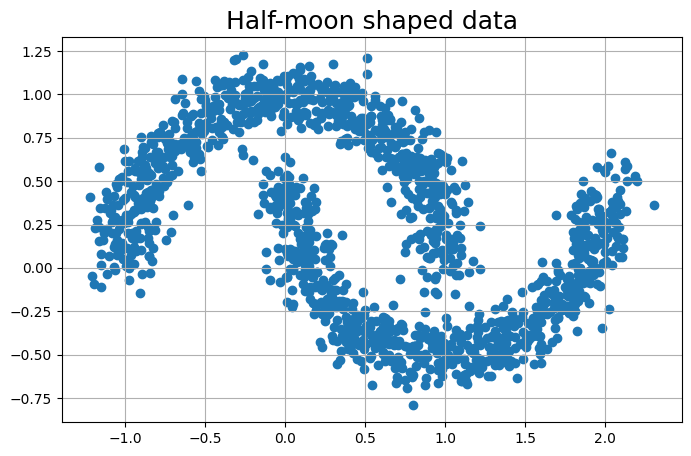

In [8]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

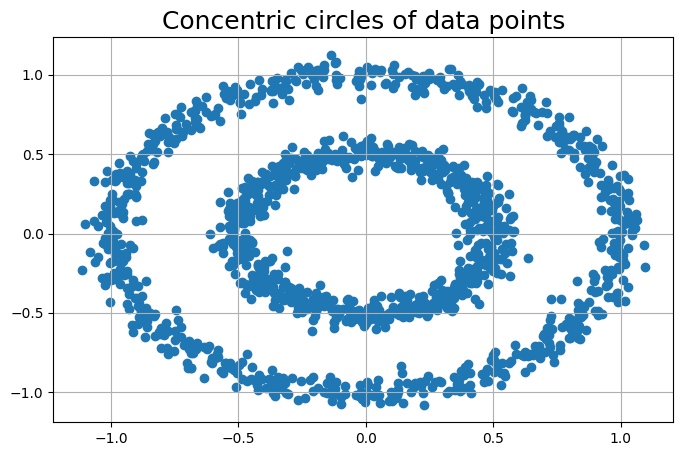

In [9]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.savefig('CIRCLE.png', dpi=300)
plt.show()

K-Means

In [10]:
# Fit K-Means Clustering on noise moon data
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [11]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.180
Silhouette Coefficient: 0.483


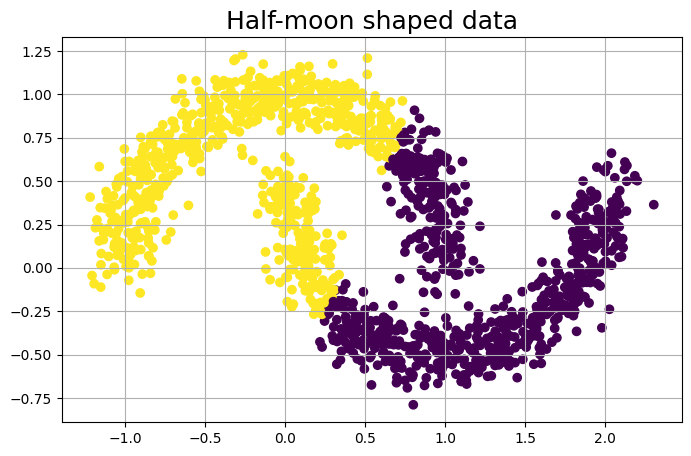

In [12]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.savefig('CLUSTER_MOON.png', dpi=300)
plt.show()

In [13]:
km.fit(noisy_circles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [14]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.354


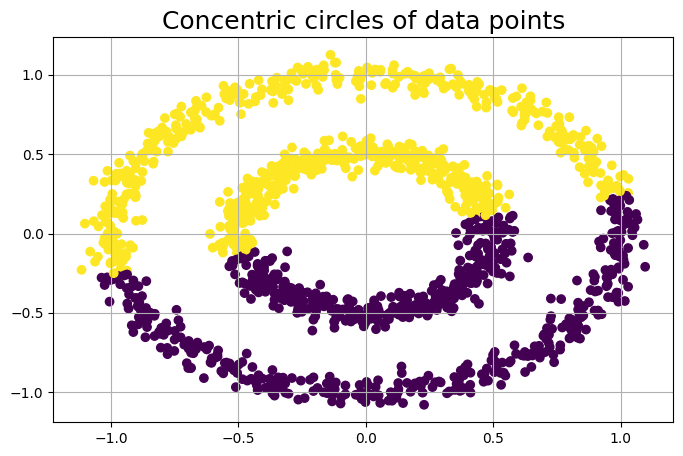

In [15]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.savefig('CLUSTER_CIRCLE.png', dpi=300)
plt.show()

DBSCAN

In [16]:
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 0, 0, ..., 0, 0, 1])

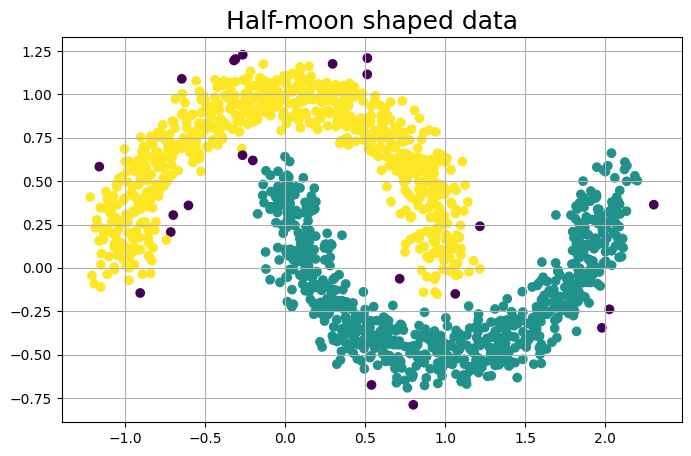

In [17]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.savefig('DBSCAN_MOON.png', dpi=300)
plt.show()

In [18]:
dbs.fit(noisy_circles)
dbs.labels_

array([0, 0, 1, ..., 0, 1, 1])

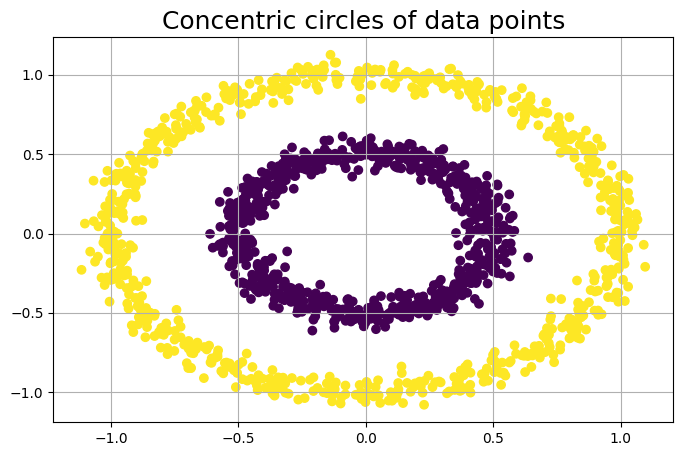

In [19]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.savefig('BSCAN_CIRCLE.png', dpi=300)
plt.show()

PCA on MOON Data

In [20]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

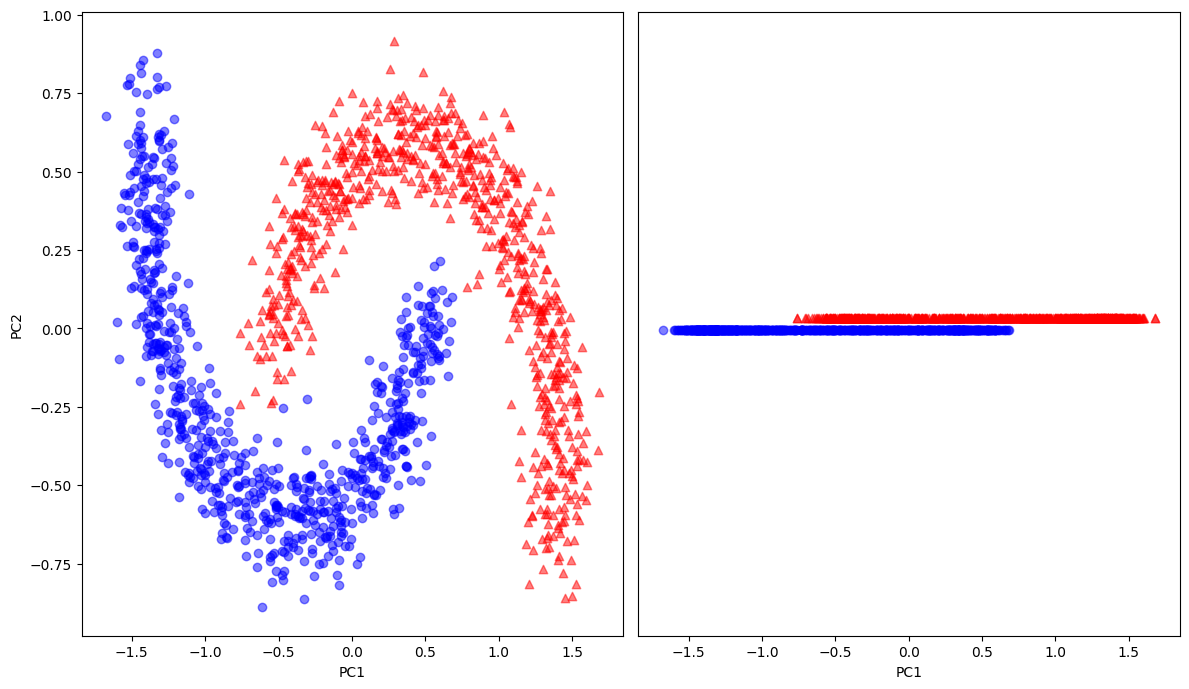

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.savefig('PCA_MOON.png', dpi=300)
plt.show()

          0         1
0  1.000000 -0.433848
1 -0.433848  1.000000


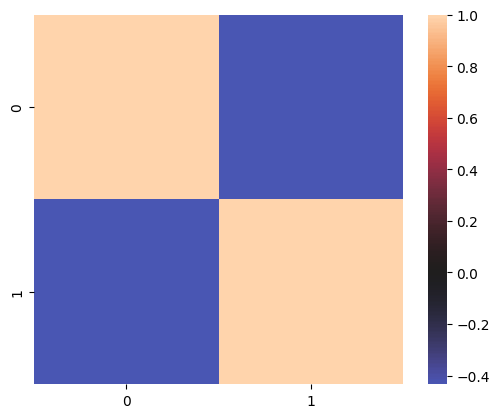

In [22]:
nm=pd.DataFrame(noisy_moons)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig('CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00 -7.155682e-17
1 -7.155682e-17  1.000000e+00


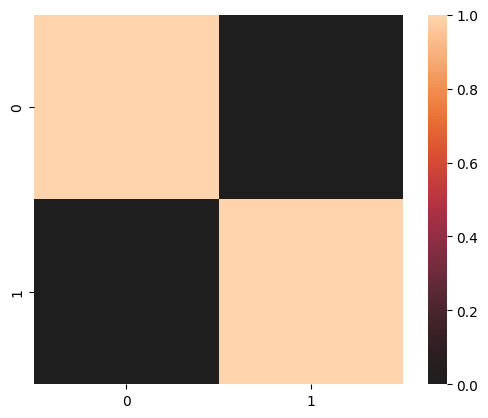

In [23]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(noisy_moons_spca)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig('PCA_CORR.png', dpi=300)

In [24]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00  1.749628e-16
1  1.749628e-16  1.000000e+00


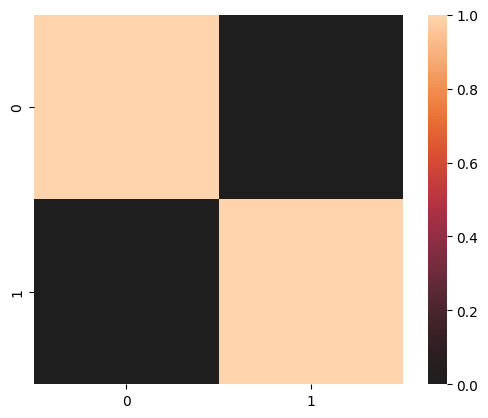

In [25]:
# Compute the correlation matrix after doing PCA

kmp=pd.DataFrame(noisy_moons_kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

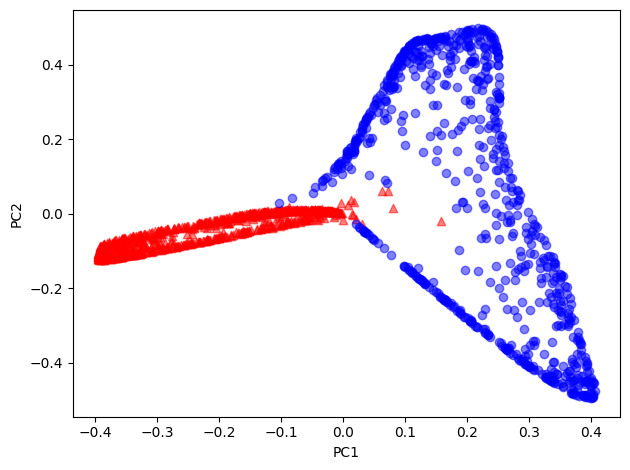

In [26]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('KPCA_MOON.png', dpi=300)

Outlier

In [27]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


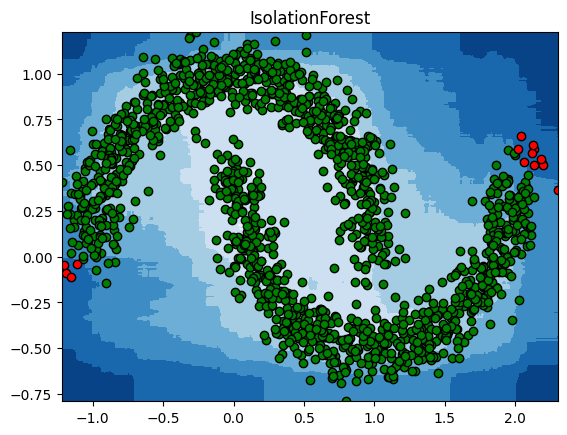

In [28]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())

In [29]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


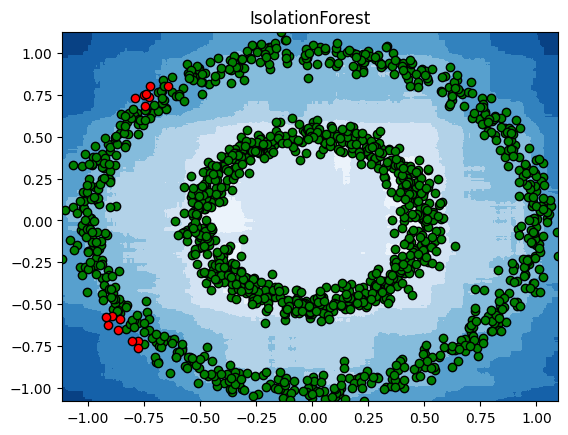

In [30]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500),
                     np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_CIRCLE.png', dpi=300)
print(pos.sum())
print(neg.sum())

Clustering and PCA on wine dataset

In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
#df_wine.to_csv('WindeData.csv')

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [32]:
#check counts of class
counts = df_wine['Class label'].value_counts()
print(counts)

2    71
1    59
3    48
Name: Class label, dtype: int64


In [35]:
# Fetch data into x and y variables
x = df_wine.iloc[:, 1:14]  # Covariates or input
y = df_wine.iloc[:, 0]     # Labels or classes or output

print(x.columns)
print(y.name)  # This will print the name of the output column, which is 'Class label'

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Class label


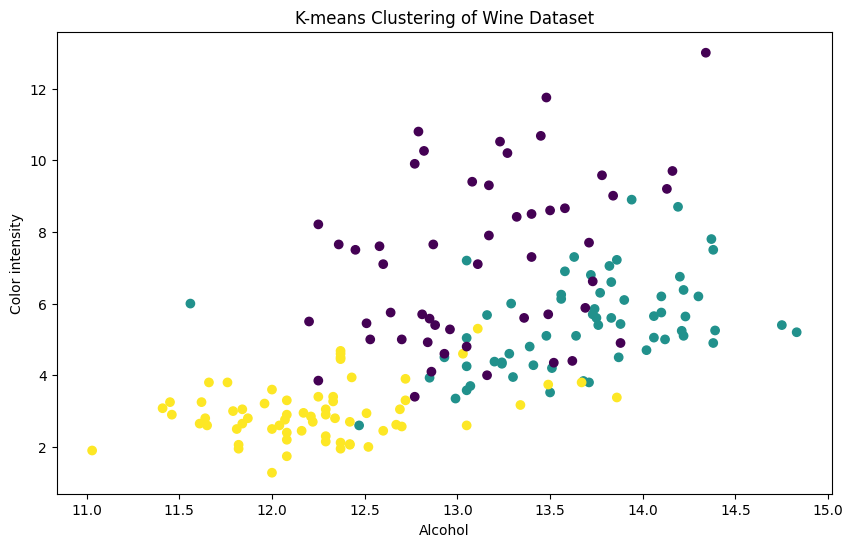

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# Assign column names
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

# Separate features (X) and target variable (y)
X = df_wine.drop('Class label', axis=1)
y = df_wine['Class label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df_wine['Cluster'] = kmeans.labels_

# Plot clusters for two features (e.g., 'Alcohol' and 'Color intensity')
plt.figure(figsize=(10, 6))
plt.scatter(df_wine['Alcohol'], df_wine['Color intensity'], c=df_wine['Cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.title('K-means Clustering of Wine Dataset')
plt.show()

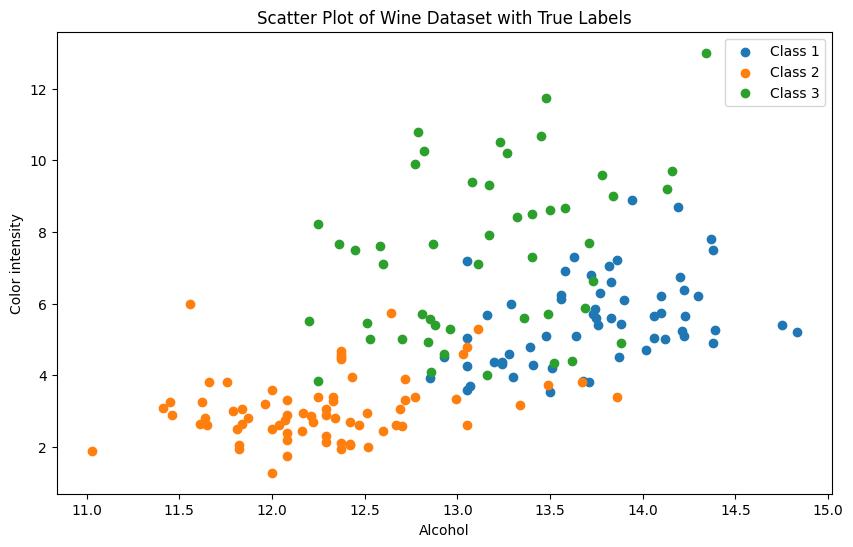

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# Assign column names
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

# Separate features (X) and true labels (y)
X = df_wine.drop('Class label', axis=1)
y = df_wine['Class label']

# Create a scatter plot for the data with true labels
plt.figure(figsize=(10, 6))

# Scatter plot for each class
for label in y.unique():
    plt.scatter(X.loc[y == label, 'Alcohol'],
                X.loc[y == label, 'Color intensity'],
                label=f'Class {label}')

# Add labels and legend
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.title('Scatter Plot of Wine Dataset with True Labels')
plt.legend()
plt.show()

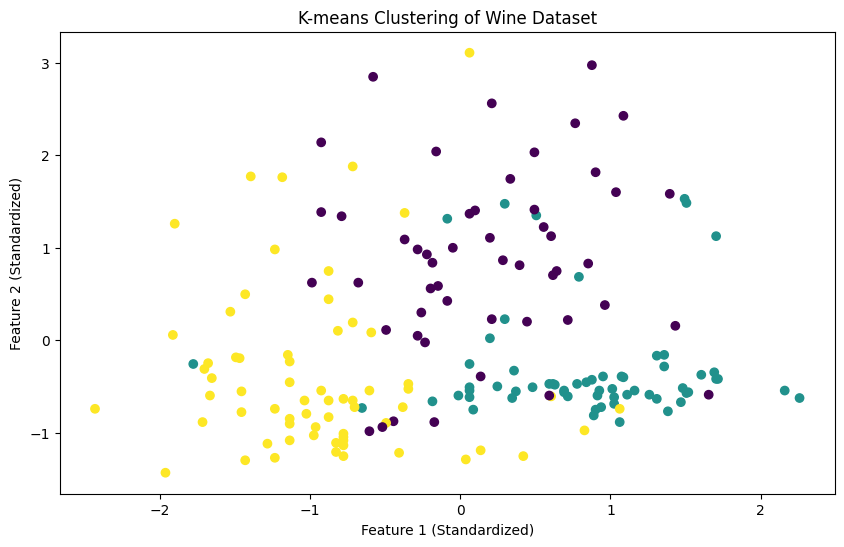

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# Assign column names
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

# Separate features (X)
X = df_wine.drop('Class label', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the predicted cluster labels
predicted_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=predicted_labels, cmap='viridis')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means Clustering of Wine Dataset')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [40]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

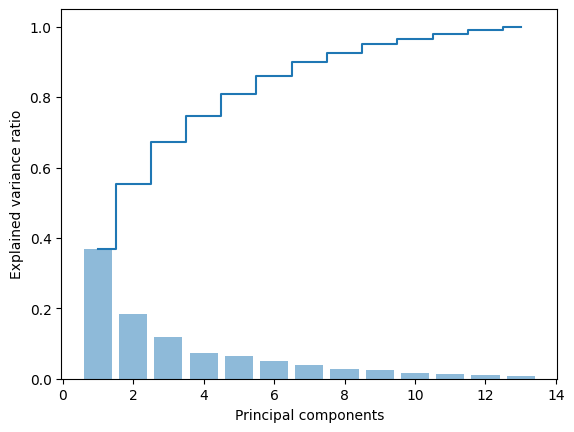

In [44]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

In [45]:
from sklearn.decomposition import PCA

# Define the PCA object with desired parameters
pca = PCA(n_components=2)  # You can specify the number of components you want to keep

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Now X_train_pca and X_test_pca contain the transformed data with reduced dimensions

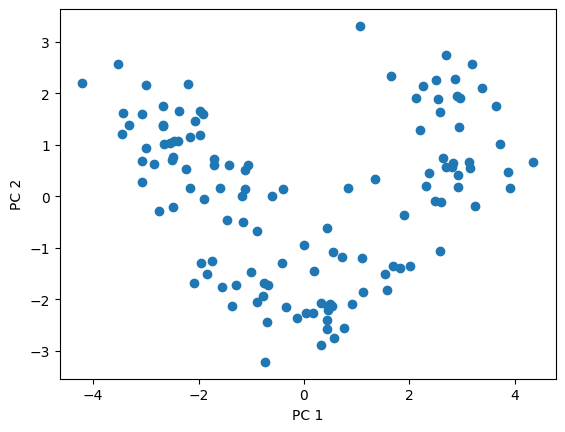

In [46]:
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

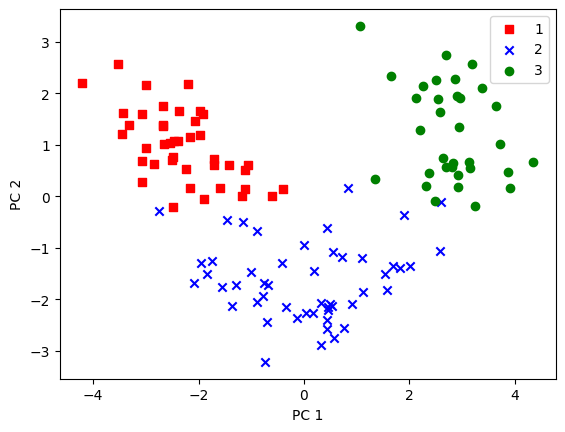

In [47]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [48]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model
lr = LogisticRegression()

# Train a Logistic regression model
lr.fit(X_train_pca, y_train)

# Test on the test data
pred_lab = lr.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_lab)
print("Accuracy on test is = %f" % (100 * accuracy))

Accuracy on test is = 92.592593


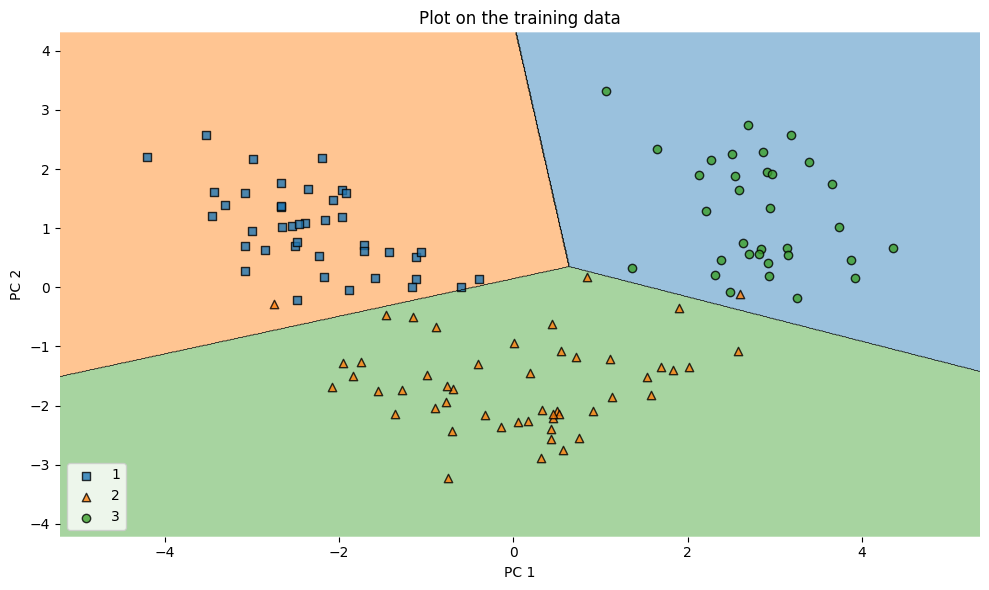

In [57]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions on the training data
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, y_train, clf=lr, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the training data')
plt.tight_layout()
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

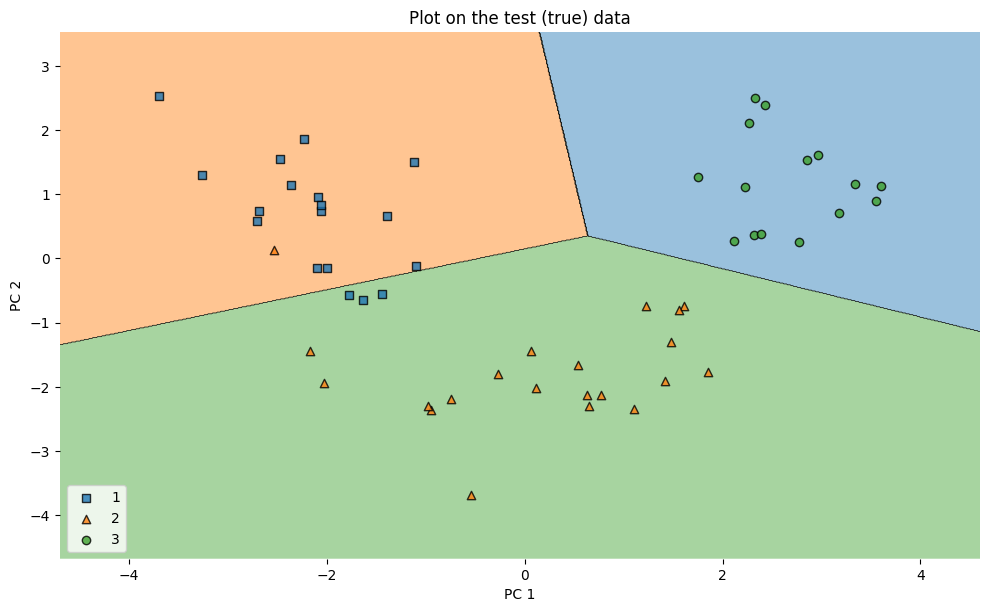

In [62]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions on the test (true) data
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, y_test, clf=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

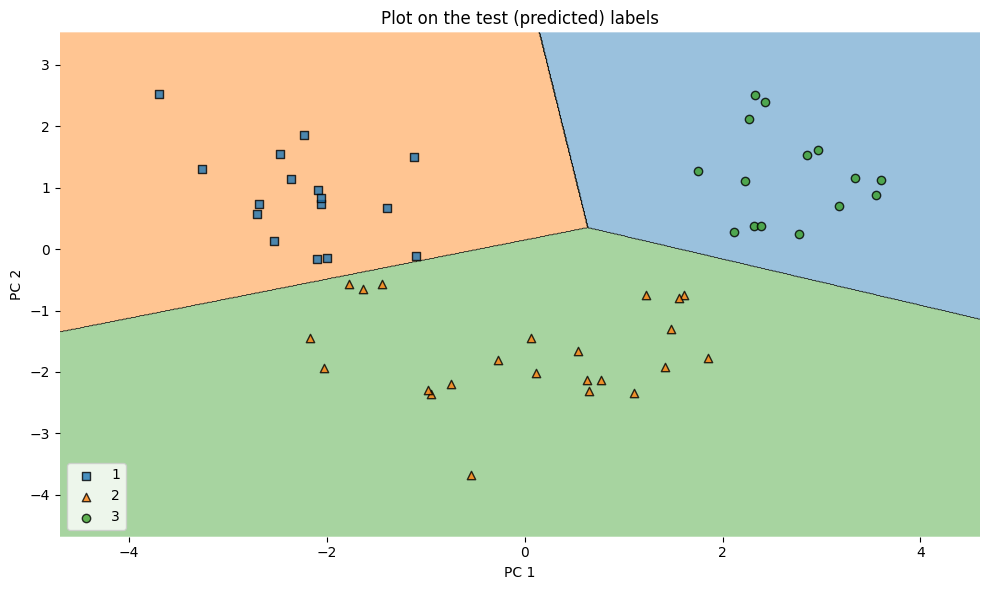

In [64]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plot decision regions on the test (predicted) labels
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_pca, pred_lab, clf=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()